In [40]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdmolops import RemoveStereochemistry, AssignStereochemistryFrom3D

Read a molecule from a PDB file

In [69]:
pdb_mol = Chem.RWMol(Chem.MolFromPDBFile("5ehp_ligand.pdb"))

Note that the reader assigned bond orders and stereochemistry

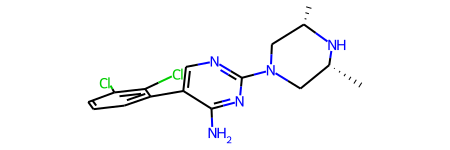

In [70]:
pdb_mol

For the sake of explanation, remove bond orders and stereochemistry

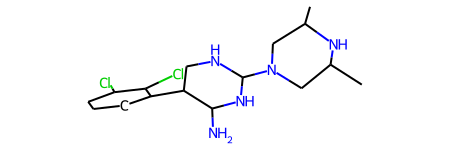

In [71]:
for bond in pdb_mol.GetBonds():
    bond.SetBondType(Chem.BondType.SINGLE)
    bond.SetIsAromatic(False)
Chem.SanitizeMol(pdb_mol)
RemoveStereochemistry(pdb_mol)
pdb_mol

Create a template for bond order assignment, note that the SMILES doesn't have stereochemistry specified. 

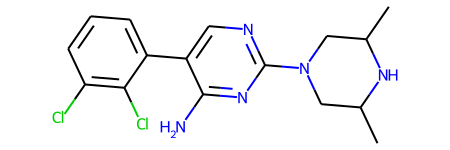

In [72]:
tmplt_mol = Chem.MolFromSmiles('CC1CN(c2ncc(-c3cccc(Cl)c3Cl)c(N)n2)CC(C)N1')
tmplt_mol

Assign the bond orders

[12:45:27] WARNING: More than one matching pattern found - picking one



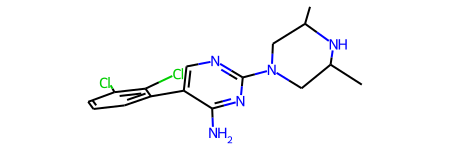

In [73]:
pdb_mol = AllChem.AssignBondOrdersFromTemplate(tmplt_mol,pdb_mol)
pdb_mol

Assign stereochemistry

In [74]:
AssignStereochemistryFrom3D(pdb_mol)

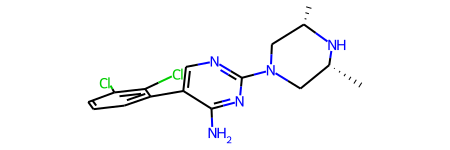

In [75]:
pdb_mol